## Q-Network Quiz

### Quiz #1 - 신경망 Optimizer 최적하
#### MomentumSGD, AdaGrad, Adam

SGD - Iteration 0, Loss: variable(0.8653738094509957)
SGD - Iteration 1000, Loss: variable(0.203741530503152)
SGD - Iteration 2000, Loss: variable(0.20176125724455832)
SGD - Iteration 3000, Loss: variable(0.1981634983941337)
SGD - Iteration 4000, Loss: variable(0.18417485538681536)
SGD - Iteration 5000, Loss: variable(0.10532672713966659)
SGD - Iteration 6000, Loss: variable(0.02079715090219108)
SGD - Iteration 7000, Loss: variable(0.014455317273677834)
SGD - Iteration 8000, Loss: variable(0.03125935539075449)
SGD - Iteration 9000, Loss: variable(0.013833239260065548)


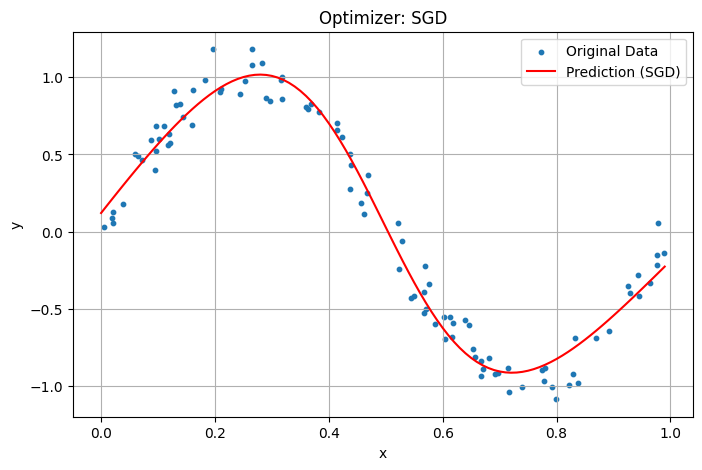

MomentumSGD - Iteration 0, Loss: variable(0.6789776632816692)
MomentumSGD - Iteration 1000, Loss: variable(0.014480672574502812)
MomentumSGD - Iteration 2000, Loss: variable(0.012249419377711361)
MomentumSGD - Iteration 3000, Loss: variable(0.011304142376385464)
MomentumSGD - Iteration 4000, Loss: variable(0.010813648484088122)
MomentumSGD - Iteration 5000, Loss: variable(0.010521219490228046)
MomentumSGD - Iteration 6000, Loss: variable(0.010329326308814057)
MomentumSGD - Iteration 7000, Loss: variable(0.010194619307307671)
MomentumSGD - Iteration 8000, Loss: variable(0.010095320023939884)
MomentumSGD - Iteration 9000, Loss: variable(0.010030279409565872)


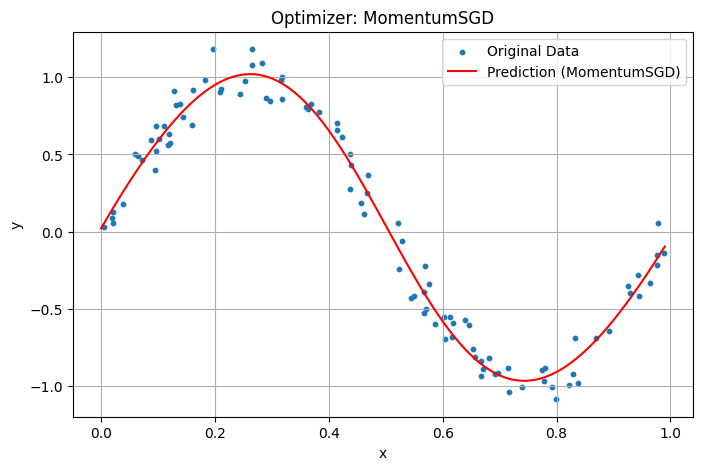

AdaGrad - Iteration 0, Loss: variable(0.6116163138395466)
AdaGrad - Iteration 1000, Loss: variable(0.07601171623428725)
AdaGrad - Iteration 2000, Loss: variable(0.02225843886152278)
AdaGrad - Iteration 3000, Loss: variable(0.018362962989096416)
AdaGrad - Iteration 4000, Loss: variable(0.016445094126442444)
AdaGrad - Iteration 5000, Loss: variable(0.015069020819036723)
AdaGrad - Iteration 6000, Loss: variable(0.013931934855904502)
AdaGrad - Iteration 7000, Loss: variable(0.013103351845312972)
AdaGrad - Iteration 8000, Loss: variable(0.01247312093787153)
AdaGrad - Iteration 9000, Loss: variable(0.011993361307362721)


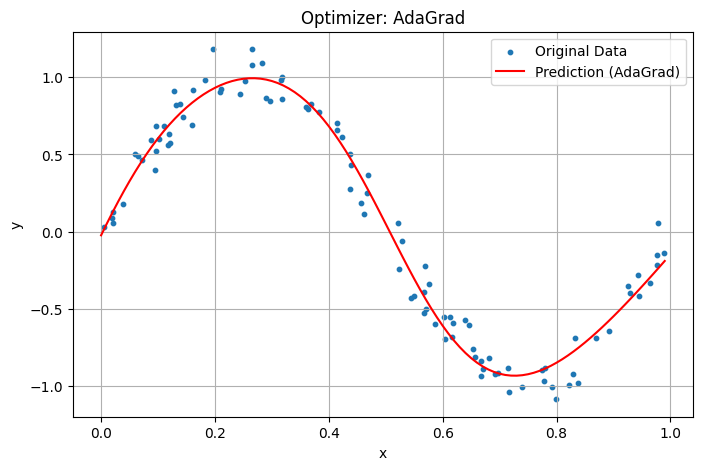

Adam - Iteration 0, Loss: variable(0.6294625367324295)
Adam - Iteration 1000, Loss: variable(0.009646105903051917)
Adam - Iteration 2000, Loss: variable(0.010505928819003476)
Adam - Iteration 3000, Loss: variable(0.009460678293381035)
Adam - Iteration 4000, Loss: variable(0.009365834117120393)
Adam - Iteration 5000, Loss: variable(0.009343723210279377)
Adam - Iteration 6000, Loss: variable(0.009329438686543208)
Adam - Iteration 7000, Loss: variable(0.009321802305717115)
Adam - Iteration 8000, Loss: variable(0.009342018345101552)
Adam - Iteration 9000, Loss: variable(0.00931417619803814)


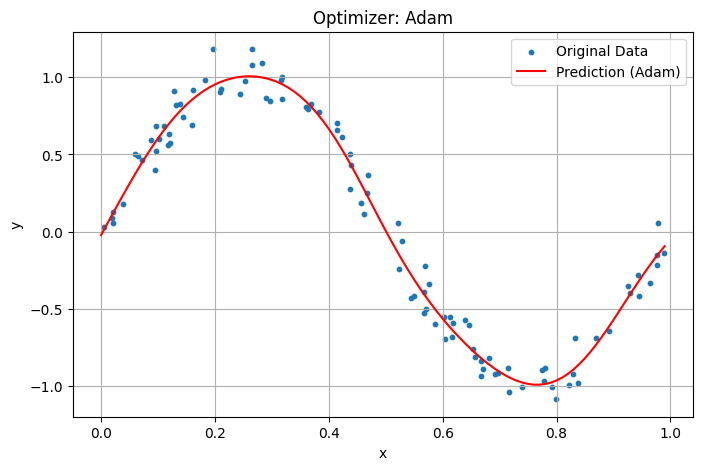

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Model
from dezero import optimizers
import dezero.functions as F
import dezero.layers as L


np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + 0.1 * np.random.randn(100, 1)

lr = 0.2
iters = 10000

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

optimizers_to_compare = {
    "SGD": optimizers.SGD(lr),
    "MomentumSGD": optimizers.MomentumSGD(lr),
    "AdaGrad": optimizers.AdaGrad(lr),
    "Adam": optimizers.Adam(lr)
}

for optimizer_name, optimizer in optimizers_to_compare.items():
    model = TwoLayerNet(10, 1)
    optimizer.setup(model)

    for i in range(iters):
        y_pred = model(x)
        loss = F.mean_squared_error(y, y_pred)

        model.cleargrads()
        loss.backward()
        optimizer.update()

        if i % 1000 == 0:
            print(f"{optimizer_name} - Iteration {i}, Loss: {loss}")


    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, s=10, label="Original Data")
    t = np.arange(0, 1, .01)[:, np.newaxis]
    y_pred = model(t)
    plt.plot(t, y_pred.data, color='r', label=f"Prediction ({optimizer_name})")
    plt.title(f"Optimizer: {optimizer_name}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()

### quiz #2 -𝑦 = sin(4𝜋 𝑥) (0 ≤ 𝑥 ≤ 1) 에 대한 loss 가 최소화 되도록 신경망을 최적화하고 결과를 출력하라.

SGD - Iteration 0, Loss: variable(0.7299965411404747)
SGD - Iteration 1000, Loss: variable(0.4515538471601536)
SGD - Iteration 2000, Loss: variable(0.4512988728436404)
SGD - Iteration 3000, Loss: variable(0.45106838432453084)
SGD - Iteration 4000, Loss: variable(0.4508480797448491)
SGD - Iteration 5000, Loss: variable(0.4506188870082108)
SGD - Iteration 6000, Loss: variable(0.450349885855402)
SGD - Iteration 7000, Loss: variable(0.44998164898483284)
SGD - Iteration 8000, Loss: variable(0.44937822334119043)
SGD - Iteration 9000, Loss: variable(0.44815517670272087)


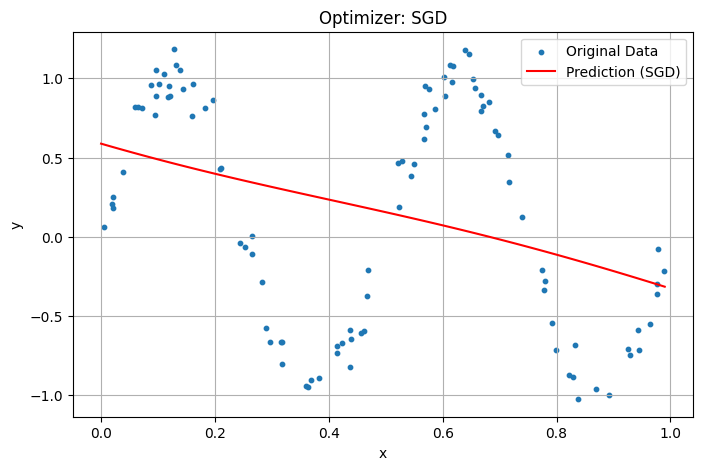

MomentumSGD - Iteration 0, Loss: variable(0.6045633699587508)
MomentumSGD - Iteration 1000, Loss: variable(0.4502446461229397)
MomentumSGD - Iteration 2000, Loss: variable(0.45004574268707687)
MomentumSGD - Iteration 3000, Loss: variable(0.4499410440952161)
MomentumSGD - Iteration 4000, Loss: variable(0.44984932158154245)
MomentumSGD - Iteration 5000, Loss: variable(0.4497227906813256)
MomentumSGD - Iteration 6000, Loss: variable(0.44937629157893555)
MomentumSGD - Iteration 7000, Loss: variable(0.44661940656071253)
MomentumSGD - Iteration 8000, Loss: variable(0.4373461283622037)
MomentumSGD - Iteration 9000, Loss: variable(0.43260763591283846)


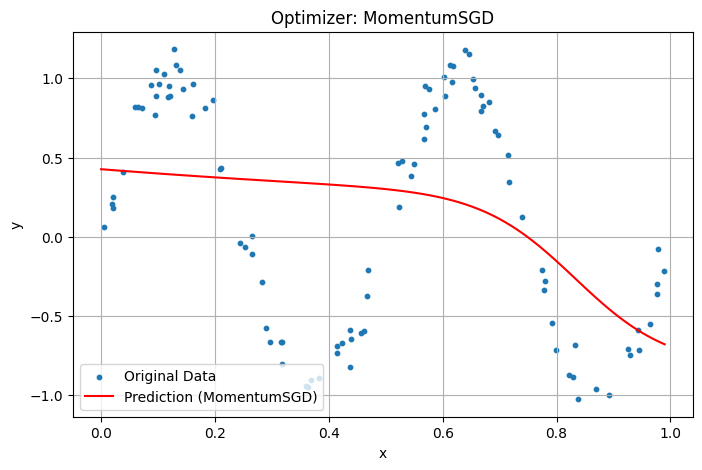

AdaGrad - Iteration 0, Loss: variable(0.6821028176451048)
AdaGrad - Iteration 1000, Loss: variable(0.45068042136885933)
AdaGrad - Iteration 2000, Loss: variable(0.4503767529906358)
AdaGrad - Iteration 3000, Loss: variable(0.45019691803740963)
AdaGrad - Iteration 4000, Loss: variable(0.4498500053995058)
AdaGrad - Iteration 5000, Loss: variable(0.4317886156339062)
AdaGrad - Iteration 6000, Loss: variable(0.4090163951395134)
AdaGrad - Iteration 7000, Loss: variable(0.3975550623157774)
AdaGrad - Iteration 8000, Loss: variable(0.382845093112037)
AdaGrad - Iteration 9000, Loss: variable(0.07568296038284586)


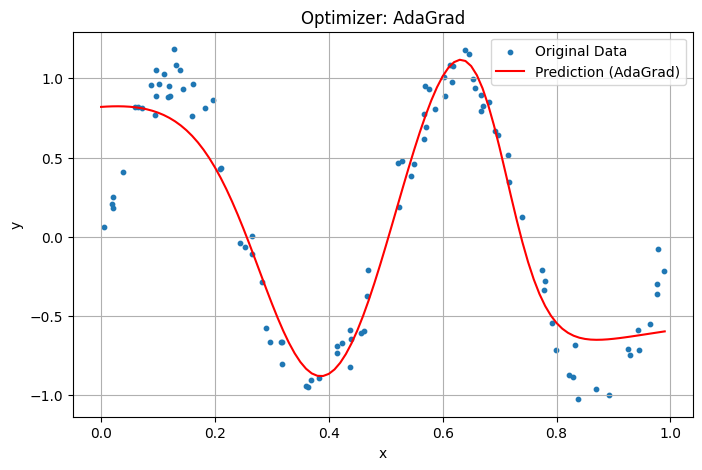

Adam - Iteration 0, Loss: variable(0.8351810858460585)
Adam - Iteration 1000, Loss: variable(0.01144574293058296)
Adam - Iteration 2000, Loss: variable(0.01142746293270702)
Adam - Iteration 3000, Loss: variable(0.009371083929622876)
Adam - Iteration 4000, Loss: variable(0.010452185749876998)
Adam - Iteration 5000, Loss: variable(0.009235965198654349)
Adam - Iteration 6000, Loss: variable(0.009222844588612517)
Adam - Iteration 7000, Loss: variable(0.009207775328327372)
Adam - Iteration 8000, Loss: variable(0.009197989391126862)
Adam - Iteration 9000, Loss: variable(0.009190983472682705)


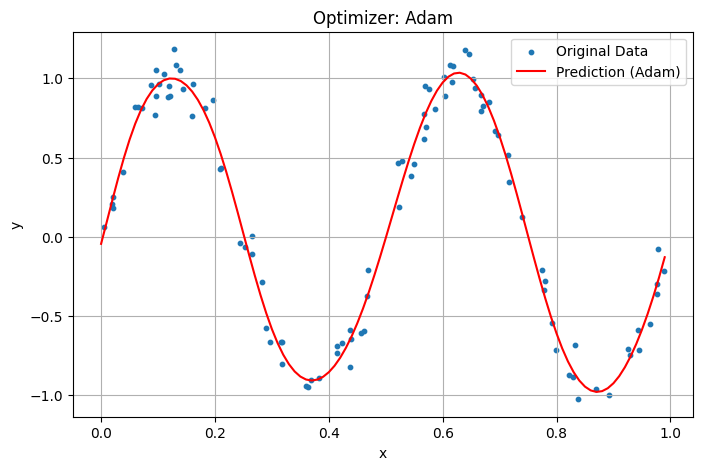

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Model
from dezero import optimizers
import dezero.functions as F
import dezero.layers as L


np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(4 * np.pi * x) + 0.1 * np.random.randn(100, 1)

lr = 0.2
iters = 10000

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

optimizers_to_compare = {
    "SGD": optimizers.SGD(lr),
    "MomentumSGD": optimizers.MomentumSGD(lr),
    "AdaGrad": optimizers.AdaGrad(lr),
    "Adam": optimizers.Adam(lr)
}

for optimizer_name, optimizer in optimizers_to_compare.items():
    model = TwoLayerNet(10, 1)
    optimizer.setup(model)

    for i in range(iters):
        y_pred = model(x)
        loss = F.mean_squared_error(y, y_pred)

        model.cleargrads()
        loss.backward()
        optimizer.update()

        if i % 1000 == 0:
            print(f"{optimizer_name} - Iteration {i}, Loss: {loss}")


    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, s=10, label="Original Data")
    t = np.arange(0, 1, .01)[:, np.newaxis]
    y_pred = model(t)
    plt.plot(t, y_pred.data, color='r', label=f"Prediction ({optimizer_name})")
    plt.title(f"Optimizer: {optimizer_name}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()

### Quiz #3 - Q-Network 를 적용하여 5x5 Grid World 에 대한 Q 테이블을 완성하고 policy 를 구하라.
단, 신경망의 최적화를 위한 파라메터를 설정하라.

Episode 0/1000, Loss: 0.0829, Epsilon: 0.8021
Episode 100/1000, Loss: 0.0002, Epsilon: 0.1000
Episode 200/1000, Loss: 0.0000, Epsilon: 0.1000
Episode 300/1000, Loss: 0.0002, Epsilon: 0.1000
Episode 400/1000, Loss: 0.0010, Epsilon: 0.1000
Episode 500/1000, Loss: 0.0003, Epsilon: 0.1000
Episode 600/1000, Loss: 0.0004, Epsilon: 0.1000
Episode 700/1000, Loss: 0.0003, Epsilon: 0.1000
Episode 800/1000, Loss: 0.0005, Epsilon: 0.1000
Episode 900/1000, Loss: 0.0035, Epsilon: 0.1000


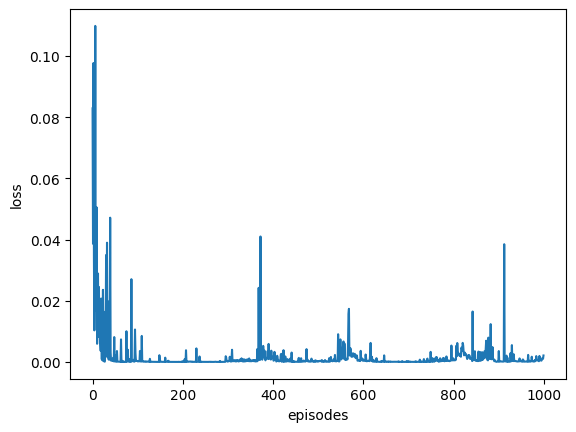

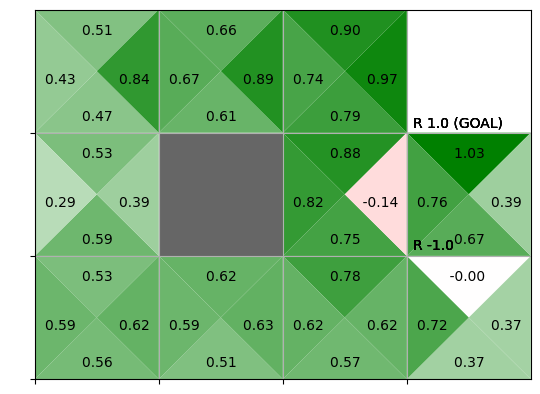

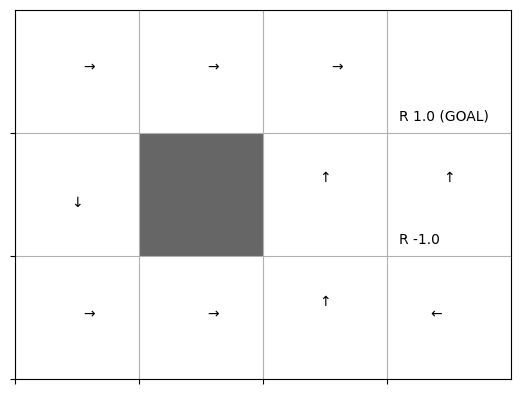

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from dezero import Model
from dezero import optimizers
import dezero.functions as F
import dezero.layers as L
from common.gridworld import GridWorld


def one_hot(state):
    # 벡터 준비
    HEIGHT, WIDTH = 5, 5
    vec = np.zeros(HEIGHT * WIDTH, dtype=np.float32)

    y, x = state
    idx = WIDTH * y + x
    vec[idx] = 1.0

    return vec[np.newaxis, :]


class QNet(Model):
    def __init__(self, hidden_size=100, output_size=4):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(output_size)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x


class QLearningAgent:
    def __init__(self, gamma=0.95, lr=0.001, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.1, hidden_size=100, output_size=4):
        self.gamma = gamma  # 감가율
        self.lr = lr  # 학습률
        self.epsilon = epsilon  # 탐험-활용 균형
        self.epsilon_decay = epsilon_decay  # ε 감소율
        self.epsilon_min = epsilon_min  # ε 최소값
        self.action_size = 4  # 가능한 액션의 수
        self.hidden_size = hidden_size  # 은닉층 크기
        self.output_size = output_size  # 출력 크기 (Q값의 수)

        # Q-Network 및 옵티마이저 초기화
        self.qnet = QNet(self.hidden_size, self.output_size)
        self.optimizer = optimizers.Adam(self.lr)  # Adam 옵티마이저 사용
        self.optimizer.setup(self.qnet)

    def get_action(self, state_vec):
        if np.random.rand() < self.epsilon:  # ε-greedy 정책 탐험
            return np.random.choice(self.action_size)
        else:  # Q-Network 활용
            qs = self.qnet(state_vec)
            return qs.data.argmax()

    def update(self, state, action, reward, next_state, done):
        if done:
            next_q = np.zeros(1, dtype=np.float32)  # 에피소드 종료 시 다음 Q값은 0
        else:
            next_qs = self.qnet(next_state)
            next_q = next_qs.max(axis=1)
            next_q.unchain()  # 역전파 계산 제외

        target = self.gamma * next_q + reward  # TD 타겟 계산

        # Q값 업데이트
        qs = self.qnet(state)
        q = qs[:, action]
        loss = F.mean_squared_error(target, q)  # MSE 손실 함수

        self.qnet.cleargrads()
        loss.backward()
        self.optimizer.update()

        # ε 감소
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)

        return loss.data

# 파라메터 설정
gamma=0.9
lr=0.001
epsilon=1.0
epsilon_decay=0.995
epsilon_min=0.1
hidden_size=100
output_size=4

env = GridWorld()
agent = QLearningAgent(gamma, lr, epsilon, epsilon_decay, epsilon_min, hidden_size, output_size)

episodes = 1000  # 에피소드 수
loss_history = []

for episode in range(episodes):
    state = env.reset()
    state = one_hot(state)
    total_loss, cnt = 0, 0
    done = False

    while not done:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        next_state = one_hot(next_state)

        loss = agent.update(state, action, reward, next_state, done)
        total_loss += loss
        cnt += 1
        state = next_state

    average_loss = total_loss / cnt
    loss_history.append(average_loss)

    if episode % 100 == 0:
        print(f"Episode {episode}/{episodes}, Loss: {average_loss:.4f}, Epsilon: {agent.epsilon:.4f}")

# 학습 결과 시각화
plt.xlabel('episodes')
plt.ylabel('loss')
plt.plot(range(len(loss_history)), loss_history)
plt.show()

# Q 테이블 생성 및 출력
Q = {}
for state in env.states():
    for action in range(agent.action_size):
        q = agent.qnet(one_hot(state))[:, action]
        Q[state, action] = float(q.data)
env.render_q(Q)


In [4]:
# Q 테이블 및 정책 생성
Q = {}
policy = {}

for state in env.states():
    qs = agent.qnet(one_hot(state))
    best_action = qs.data.argmax()  # 최적의 행동 선택
    policy[state] = best_action  # 정책 저장
    for action in range(agent.action_size):
        Q[state, action] = float(qs.data[0, action])  # Q 테이블 저장

# Q 테이블 출력
print("Q 테이블:")
for state in Q:
    print(f"State: {state[0]}, Action: {state[1]}, Q-value: {Q[state]}")

# 정책 출력
print("\nPolicy:")
for state in policy:
    print(f"State: {state}, Best Action: {env.action_meaning[policy[state]]}")

Q 테이블:
State: (0, 0), Action: 0, Q-value: 0.5082912445068359
State: (0, 0), Action: 1, Q-value: 0.4714983105659485
State: (0, 0), Action: 2, Q-value: 0.4341954290866852
State: (0, 0), Action: 3, Q-value: 0.8370070457458496
State: (0, 1), Action: 0, Q-value: 0.6570677161216736
State: (0, 1), Action: 1, Q-value: 0.6117208003997803
State: (0, 1), Action: 2, Q-value: 0.6710969805717468
State: (0, 1), Action: 3, Q-value: 0.8939908146858215
State: (0, 2), Action: 0, Q-value: 0.8971067667007446
State: (0, 2), Action: 1, Q-value: 0.7862273454666138
State: (0, 2), Action: 2, Q-value: 0.7411519885063171
State: (0, 2), Action: 3, Q-value: 0.9715120196342468
State: (0, 3), Action: 0, Q-value: 0.5105817914009094
State: (0, 3), Action: 1, Q-value: 0.45226749777793884
State: (0, 3), Action: 2, Q-value: 0.45922234654426575
State: (0, 3), Action: 3, Q-value: 0.580070972442627
State: (1, 0), Action: 0, Q-value: 0.5291873812675476
State: (1, 0), Action: 1, Q-value: 0.5850884318351746
State: (1, 0), Actio